# Can You aFORD It?
Andrew Barreiros

## Introduciton
Intro goes here.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Outline of data
outline of data being imported

In [2]:
cars_df = pd.read_csv('TrueCarListings.csv')
cars_df['State'] = cars_df['State'].str.upper()
del cars_df['Id']
cars_df

,Price,Year,Mileage,City,State,Vin,Make,Model
0,16472,2015,18681,Jefferson City,MO,KL4CJBSBXFB267643,Buick,EncoreConvenience
1,15749,2015,27592,Highland,IN,KL4CJASB5FB245057,Buick,EncoreFWD
2,16998,2015,13650,Boone,NC,KL4CJCSB0FB264921,Buick,EncoreLeather
3,15777,2015,25195,New Orleans,LA,KL4CJASB4FB217542,Buick,EncoreFWD
4,16784,2015,22800,Las Vegas,NV,KL4CJBSB3FB166881,Buick,EncoreConvenience
5,17020,2016,16877,Grand Island,NY,KL4CJASB7GB536760,Buick,EncoreFWD
6,15950,2015,27885,West Covina,CA,KL4CJASB3FB241802,Buick,EncoreFWD
7,17091,2016,24008,Little Rock,AR,KL4CJASBXGB565542,Buick,EncoreFWD
8,16995,2015,8624,Punta Gorda,FL,KL4CJFSB7FB173565,Buick,EncoreConvenience
9,17700,2015,13807,Jacksonville,NC,KL4CJBSB8FB068543,Buick,EncoreConvenience


In [3]:
cars_df.dtypes

Price       int64
Year        int64
Mileage     int64
City       object
State      object
Vin        object
Make       object
Model      object
dtype: object

In [4]:
cars_df['Make'].value_counts()

Ford             161999
Chevrolet        150426
Honda             76880
Nissan            71554
Jeep              60323
Hyundai           54647
Dodge             50688
GMC               43045
Kia               42834
Mercedes-Benz     38131
Toyota            37843
BMW               32415
Lexus             29831
Chrysler          23848
Cadillac          21911
Mazda             19857
Buick             18157
INFINITI          17752
Audi              12618
Acura             11049
Lincoln           10069
Volkswagen        10058
Ram                8382
Subaru             7754
MINI               6224
Mitsubishi         5933
Land               5844
Jaguar             3114
FIAT               2613
Volvo              1897
Mercury            1594
Porsche            1556
Maserati           1379
HUMMER             1333
Scion              1317
Pontiac             849
Saturn              477
Ferrari             420
Bentley             367
smart               285
Genesis             209
Suzuki          

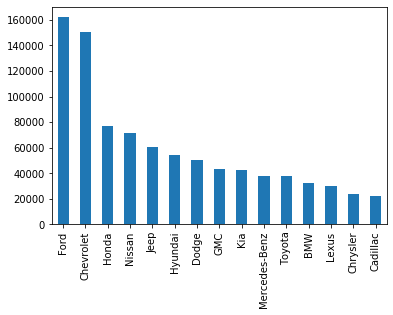

In [5]:
cars_df['Make'].value_counts().head(15).plot('bar')
plt.show()

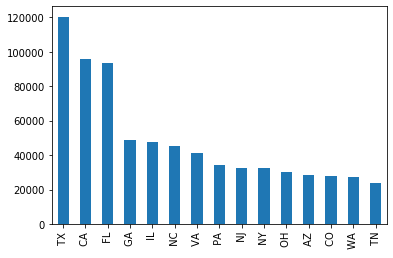

In [6]:
cars_df['State'].value_counts().head(15).plot('bar')
plt.show()

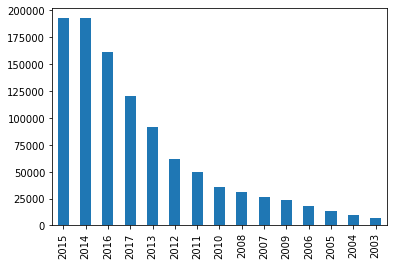

In [7]:
cars_df['Year'].value_counts().head(15).plot('bar')
plt.show()

#### Selecting Makes for Anaylsis
Why you choose brands.

In [8]:
ford = cars_df.loc[cars_df['Make'] == 'Ford']



In [13]:
np.mean(ford['Price'])

21311.796720967413

In [14]:
np.std(ford['Price'])

11377.819666120042

In [15]:
np.median(ford['Price'])

18981.0

### Price difference based on location

In [31]:
ford_price_state_mean = ford.groupby(['State'], as_index = False).mean()
ford_price_state_year = ford.groupby(['State', 'Year']).mean().reset_index()

ford_price_state_std = ford.groupby(['State']).std().reset_index()
ford_price_state_std

,State,Price,Year,Mileage
0,AK,11510.771757,3.858131,41178.775043
1,AL,11143.423660,3.276658,45793.288942
2,AR,11601.985982,3.339692,44815.810166
3,AZ,10769.535630,3.740282,41340.635380
4,CA,10491.461078,3.396572,36956.930615
5,CO,11548.143101,4.270977,50620.546667
6,CT,11040.858111,3.571593,36942.117418
7,DC,NaN,NaN,NaN
8,DE,10690.467504,2.931020,34974.081755
9,FL,10990.352999,3.448236,46528.657714


In [19]:
ford_price_state_mean.nlargest(3, 'Price').sort_values('Price')

,State,Price,Year,Mileage
44,UT,24898.946067,2013.732210,51450.007116
25,MS,25562.587838,2013.718468,56715.041104
50,WY,25738.415205,2012.795322,62893.707602


In [20]:
ford_price_state_mean.nsmallest(4, 'Price')
#need to figure out how to delete DC from the data as it is an outlier

,State,Price,Year,Mileage
7,DC,9495.000000,2002.000000,135995.000000
22,MI,18048.912112,2012.636306,65650.134867
11,HI,18328.852227,2011.161943,57282.419028
45,VA,18335.214612,2012.390326,64783.212075


In [32]:
UT_std = ford_price_state_std.loc[ford_price_state_std['State'] =='UT']
UT_std
#is there a better way to show the top 3 std deviation

,State,Price,Year,Mileage


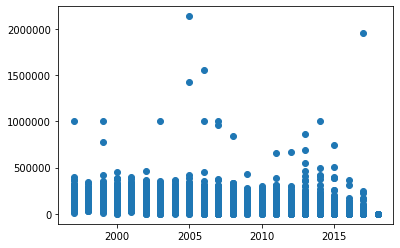

In [34]:
plt.scatter(
    x = ford['Year'],
    y = ford['Mileage']   
)

plt.show()

#how to clean up? is there a better way to present this data?
#how to show price vs mileage by year?